# Gold Standard 1 : Shaw (2009)



- Performed by: Ali Riazi
- Reviewed by: Johan Iraeus and Beng Pipkorn
- Last modified : 2024-01-18
- SAFER HBM Version: `SAFER HBM V11.0`
- LSDYNA version:  `mpp d R12.2.1 `


## Tests by Shaw (2009)

The simulated outputs are compared to the references from PMHS tests reported by Shaw  <sup>[1]</sup>
1.  Shaw G, Parent D, Purtsezov S, Lessley D, Crandall J, Kent R, Guillemot H, Ridella SA, Takhounts E, Martin P. Impact response of restrained PMHS in frontal sled tests: skeletal deformation patterns under seat belt loading. Stapp Car Crash J. 2009 Nov;53:1-48. doi: 10.4271/2009-22-0001. PMID: 20058549.


![Isometric view](Capture.PNG) 

### Information on the subjects/specimens
- Tests on 8 Male PMHS close to the average age of 54 and weight of 75.5kg are evaluated.
 
| **Run ID** | **Cadaver#** | **Sex** | **Age [years]** | **Weight [kg]** | **Height [cm]** | **Sled velocity [Km/h]** |
| :--------: | :----------: | :-----: | :-------------: | :-------------: | :-------------: | :----------------------: |
|    1294    |     411      |  Male   |       76        |       70        |       178       |            40            |
|    1295    |     403      |  Male   |       47        |       68        |       177       |            40            |
|    1358    |     425      |  Male   |       54        |       79        |       177       |            40            |
|    1359    |     426      |  Male   |       49        |       76        |       184       |            40            |
|    1360    |     428      |  Male   |       57        |       64        |       175       |            40            |
|    1378    |     443      |  Male   |       72        |       81        |       184       |            40            |
|    1379    |     433      |  Male   |       40        |       88        |       179       |            40            |
|    1380    |     441      |  Male   |       37        |       78        |       180       |            40            |

### Loading and Boundary Conditions
- The lower extremities,pelvis, knees and legs were constrained by a rigid seat and rigid knee and foot supports. 
- The upper body was constrained using a shoulder belt and a separate lap belt. 
- A square crash pulse corresponding to a frontal impact with a change in velocity of 30km/h and a peak acceleration of about 12-15 G’s was used.

#### Pre-Simulation for Initial position:
- The HBM is brought into position using cables and gravity setteling for $350 ms$.
- `GLOBAL_DAMPING` of magnitude $0.05$ is defined during this phase to avoid any kinetic energy.
- 12 cables (head COG, T1, Upper extremity and lower extremity) attached to the bones are used to position the body parts.
- matched  the posture to the average initional position repoted by VICON markers.


### Responses recorded
- Results reported in the litrature are compared.
- The reference values from the paper were digitalised  and are incuded in the notebook. The data corresponds to the unnormalised corridors.


In [1]:
import os
import glob
import math
# for data analysis
import pandas as pd
import numpy as np
# packages for plotting
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import table
from scipy import ndimage

C:\Users\seyedri\AppData\Roaming\Python\Python39\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [42]:
# Plot formats
sns.set()
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1)
s10 = {"linestyle" :'-', "color" : 'b',"alpha" :1,"linewidth":3}
pmhs = {"linestyle" :'-', "color" : 'k',"alpha" : .5}
test_corr = {"linestyle":'--',"color": 'grey',"alpha" : 1}
Test_avg = {"linestyle" :'-', "color" : 'k',"alpha" :1,"linewidth":1, 'marker' :"o", 'markevery': 150}

In [3]:
binout_path_sim={}
result_output_dir={}

Tests=["40kmh"]

figures_dir = "data/figures/"
processed_data_dir = f"data/processed"
experiment_dir= "../experiment_data/"
if not os.path.exists(figures_dir): 
    os.makedirs(figures_dir)
if not os.path.exists(processed_data_dir): 
    os.makedirs(processed_data_dir)

for test in Tests:
    binout_path_sim[test] = test
    result_output_dir[test] = os.path.join(processed_data_dir, binout_path_sim[test])
    if not os.path.exists(result_output_dir[test]): 
        os.makedirs(result_output_dir[test])


## Postprocessing with dynasaur

In [4]:
# Import the dynasaur library
from dynasaur.plugins.data_visualization_controller import DataVisualizationController

In [5]:
# Path to Dynasaur definition files

# Dynasaur object definitions
dynasaur_ids = ['../_env/rib_strain_parts_v11.def',"../_env/id_v11.def"]

# Dynasaur calculation definitions
dynasaur_calculation_defs = [ '../_env/rib_strain_calculator.def',"../_env/post.def"]

In [6]:
sim_output={}
for test in Tests:
    sim = DataVisualizationController(calculation_procedure_def_file=dynasaur_calculation_defs,
                                                  object_def_file=dynasaur_ids,
                                                  data_source= binout_path_sim[test] +'/binout*')
    commands = sim.get_defined_calculation_procedures()
    print(commands)
    for command in sim.get_defined_calculation_procedures():
        sim.calculate(command)
    sim.write_CSV(result_output_dir[test], filename="Dynasaur_output.csv")

    sim_output[test]=pd.read_csv(os.path.join(result_output_dir[test],"Dynasaur_output.csv"), delimiter=';', na_values='-', header = [0,1,2,3])
    


[READ DYNASAUR DEF]	read ../_env/rib_strain_calculator.def
[READ DYNASAUR DEF]	read ../_env/post.def
[READ DYNASAUR DEF]	done
[READ DYNASAUR DEF]	read ../_env/rib_strain_parts_v11.def
[READ DYNASAUR DEF]	read ../_env/id_v11.def
[READ DYNASAUR DEF]	done
[READ BINOUT]	read elout data ...
[READ BINOUT]	elout: initialize stress shell
[READ BINOUT]	assign stresses for shell elements
[READ BINOUT]	extract data took : 109.67620396614075
[READ BINOUT]	calc eigenvalue
[READ BINOUT]	calc eigenvalues took : 63.7410786151886
[READ BINOUT]	assign strains for shell elements
[READ BINOUT]	elout: initialize strain shell
[READ BINOUT]	extract data took : 50.97574067115784
[READ BINOUT]	calc eigenvalue
[READ BINOUT]	calc eigenvalues took : 24.92167067527771
[READ BINOUT]	elout: initialize stress beam
[READ BINOUT]	assign stresses for beam elements
[READ BINOUT]	nothing to extract
[READ BINOUT]	assign strains for beam elements
[READ BINOUT]	nothing to extract
[READ BINOUT]	done reading elout!
[READ BINOU

In [9]:
Exp_Tests = []
exp = {}
for path in os.listdir(experiment_dir):
    # check if current path is a file
    if os.path.isfile(os.path.join(experiment_dir, path)):
        Exp_Tests.append(path)
for test in Exp_Tests:
    if test == 'kinematics.csv':
        exp[test] = pd.read_csv(os.path.join(experiment_dir,test),delimiter=',')
    else:
        exp[test] = pd.read_csv(os.path.join(experiment_dir,test),delimiter=',',header=None)
for test in Exp_Tests:
    if test != 'kinematics.csv':
        exp[test].loc[-1] = 0
        exp[test].index = exp[test].index + 1
        exp[test].sort_index(inplace=True)

In [10]:
## Resample data
def resam(xdata,ydata,endtime):
    x = xdata
    y = ydata
    # Interpolate the data to the desired length
    newx = np.arange(0,endtime,0.1)#10kHz resolution
    newy = np.interp(newx, x, y)
    return np.array(newy).flatten()

T_samp = np.arange(0,200,.1)
test_avg = {}
tmp = 0
for test in ['Lower_shoulder_belt_1.csv','Lower_shoulder_belt_2.csv','Lower_shoulder_belt_3.csv','Lower_shoulder_belt_4.csv','Lower_shoulder_belt_5.csv','Lower_shoulder_belt_6.csv',
             'Lower_shoulder_belt_7.csv','Lower_shoulder_belt_8.csv']:
    exp_res = resam(exp[test][0],exp[test][1],200)
    tmp  = tmp + exp_res/8
test_avg['Lower_shoulder_belt'] = tmp
exp['Lower_shoulder_belt'] = tmp
tmp = 0
for test in ['Upper_shoulder_belt_1.csv','Upper_shoulder_belt_2.csv','Upper_shoulder_belt_3.csv','Upper_shoulder_belt_4.csv','Upper_shoulder_belt_5.csv','Upper_shoulder_belt_6.csv',
             'Upper_shoulder_belt_7.csv','Upper_shoulder_belt_8.csv']:
    exp_res = resam(exp[test][0],exp[test][1],200)
    tmp  = tmp + exp_res/8
test_avg['Upper_shoulder_belt'] = tmp
exp['Upper_shoulder_belt'] = tmp


### Boundary Conditions
#### Seat belt

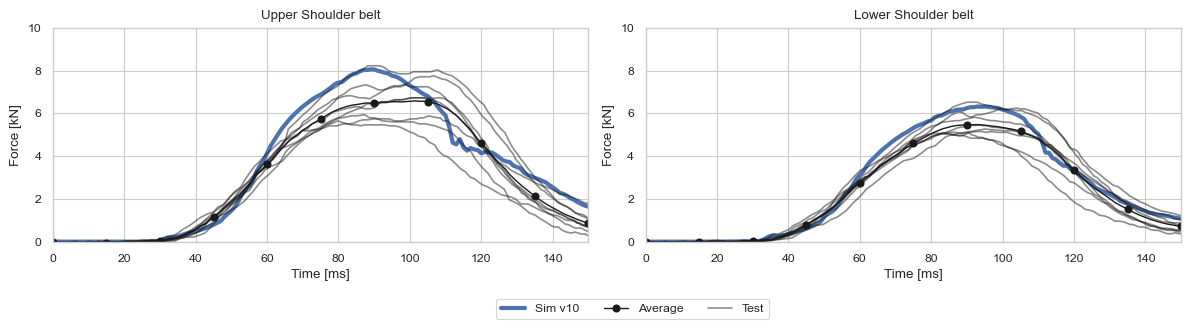

In [43]:
Sim_ISO = {}
Sim_ISO['Upper_shoulder_belt'] = sim_output[Tests[0]].BELT.Belt_force_Shoulder_upper.force.iloc[350:475]-sim_output[Tests[0]].BELT.Belt_force_Shoulder_upper.force.iloc[350]
Sim_ISO['Lower_shoulder_belt'] = sim_output[Tests[0]].BELT.Belt_force_Shoulder_lower.force.iloc[350:475]-sim_output[Tests[0]].BELT.Belt_force_Shoulder_lower.force.iloc[350]

fig_sb, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,3))
for i in range(0,2):
    ax[i].set_ylabel('Force [kN]');
    ax[i].set_xlabel('Time [ms]');
ax[0].plot(sim_output[Tests[0]].BELT.Belt_force_Shoulder_upper.time-350, 
           sim_output[Tests[0]].BELT.Belt_force_Shoulder_upper.force, **s10)
ax[0].plot(T_samp,test_avg['Upper_shoulder_belt'],**Test_avg)
ax[0].plot(exp['Upper_shoulder_belt_1.csv'][0], exp['Upper_shoulder_belt_1.csv'][1],**pmhs)
ax[0].plot(exp['Upper_shoulder_belt_2.csv'][0], exp['Upper_shoulder_belt_2.csv'][1],**pmhs)
ax[0].plot(exp['Upper_shoulder_belt_3.csv'][0], exp['Upper_shoulder_belt_3.csv'][1],**pmhs)
ax[0].plot(exp['Upper_shoulder_belt_4.csv'][0], exp['Upper_shoulder_belt_4.csv'][1],**pmhs)
ax[0].plot(exp['Upper_shoulder_belt_5.csv'][0], exp['Upper_shoulder_belt_5.csv'][1],**pmhs)
ax[0].plot(exp['Upper_shoulder_belt_6.csv'][0], exp['Upper_shoulder_belt_6.csv'][1],**pmhs)
ax[0].plot(exp['Upper_shoulder_belt_7.csv'][0], exp['Upper_shoulder_belt_7.csv'][1],**pmhs)
ax[0].plot(exp['Upper_shoulder_belt_8.csv'][0], exp['Upper_shoulder_belt_8.csv'][1],**pmhs)
ax[0].set(xlim=[0,150],ylim=[0,10],title='Upper Shoulder belt')


ax[1].plot(sim_output[Tests[0]].BELT.Belt_force_Shoulder_lower.time-350, 
           sim_output[Tests[0]].BELT.Belt_force_Shoulder_lower.force, **s10)
ax[1].plot(T_samp,test_avg['Lower_shoulder_belt'],**Test_avg)
ax[1].plot(exp['Lower_shoulder_belt_1.csv'][0], exp['Lower_shoulder_belt_1.csv'][1],**pmhs)
ax[1].plot(exp['Lower_shoulder_belt_2.csv'][0], exp['Lower_shoulder_belt_2.csv'][1],**pmhs)
ax[1].plot(exp['Lower_shoulder_belt_3.csv'][0], exp['Lower_shoulder_belt_3.csv'][1],**pmhs)
ax[1].plot(exp['Lower_shoulder_belt_4.csv'][0], exp['Lower_shoulder_belt_4.csv'][1],**pmhs)
ax[1].plot(exp['Lower_shoulder_belt_5.csv'][0], exp['Lower_shoulder_belt_5.csv'][1],**pmhs)
ax[1].plot(exp['Lower_shoulder_belt_6.csv'][0], exp['Lower_shoulder_belt_6.csv'][1],**pmhs)
ax[1].plot(exp['Lower_shoulder_belt_7.csv'][0], exp['Lower_shoulder_belt_7.csv'][1],**pmhs)
ax[1].plot(exp['Lower_shoulder_belt_8.csv'][0], exp['Lower_shoulder_belt_8.csv'][1],**pmhs)
ax[1].set(xlim=[0,150],ylim=[0,10],title='Lower Shoulder belt')


fig_sb.legend(['Sim v10','Average','Test'], bbox_to_anchor=(0.65,0.01),ncols=4)
fig_sb.savefig(os.path.join(figures_dir, 'Figure_v10.0_{}.jpg'.format(pd.to_datetime('today').strftime('%Y%m%d_%H%M%S'))), transparent=False, dpi=600, bbox_inches="tight")
fig_sb.tight_layout()

### HBM Kinematics


#### Head

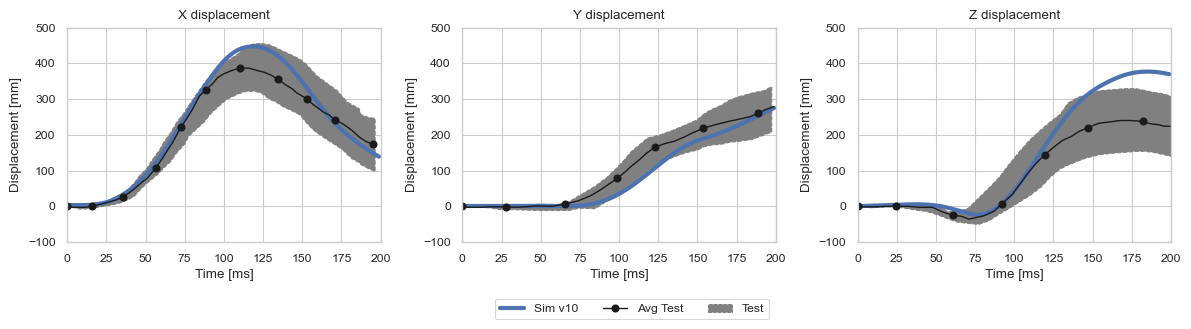

In [44]:
Sim_ISO['Head_x_disp.csv'] = sim_output[Tests[0]].SLED.Head_Disp_x.displacement.iloc[350:475]-sim_output[Tests[0]].SLED.Head_Disp_x.displacement.iloc[350]-sim_output[Tests[0]].SLED.Sled_Disp_x.displacement.iloc[350:475]
Sim_ISO['Head_y_disp.csv'] = sim_output[Tests[0]].SLED.Head_Disp_y.displacement.iloc[350:475]-sim_output[Tests[0]].SLED.Head_Disp_y.displacement.iloc[350]
Sim_ISO['Head_z_disp.csv'] = sim_output[Tests[0]].SLED.Head_Disp_z.displacement.iloc[350:475]-sim_output[Tests[0]].SLED.Head_Disp_z.displacement.iloc[350]

Test_avg = {"linestyle" :'-', "color" : 'k',"alpha" :1,"linewidth":1, 'marker' :"o", 'markevery': 5}
fig_Kin, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,3))
for i in range(0,3):
    ax[i].set_ylabel('Displacement [mm]');
    ax[i].set_xlabel('Time [ms]');
ax[0].plot(sim_output[Tests[0]].SLED.Head_Disp_x.time-350., sim_output[Tests[0]].SLED.Head_Disp_x.displacement-sim_output[Tests[0]].SLED.Sled_Disp_x.displacement-42, **s10,label='SAFER10.0')
ax[0].plot(exp['Head_x_disp.csv'][0], exp['Head_x_disp.csv'][1],**Test_avg)
factor = np.shape(exp['Head_x_disp_neg.csv'][1])[0]/np.shape(exp['Head_x_disp_pos.csv'][1])[0]
tmp = ndimage.zoom(exp['Head_x_disp_pos.csv'][1],factor)
ax[0].fill_between(exp['Head_x_disp_neg.csv'][0],exp['Head_x_disp_neg.csv'][1],tmp,**test_corr)
ax[0].set_xlim(0,200)
ax[0].set_ylim(-100 ,500)
ax[0].set_title('X displacement')


ax[1].plot(sim_output[Tests[0]].SLED.Head_Disp_y.time-350., sim_output[Tests[0]].SLED.Head_Disp_y.displacement,**s10)
ax[1].plot(exp['Head_y_disp.csv'][0], exp['Head_y_disp.csv'][1],**Test_avg)
factor = np.shape(exp['Head_y_disp_neg.csv'][1])[0]/np.shape(exp['Head_y_disp_pos.csv'][1])[0]
tmp = ndimage.zoom(exp['Head_y_disp_pos.csv'][1],factor)
ax[1].fill_between(exp['Head_y_disp_neg.csv'][0],exp['Head_y_disp_neg.csv'][1],tmp,**test_corr)
ax[1].set_ylim(-100 ,500)
ax[1].set_xlim(0,200)
ax[1].set_title('Y displacement')

ax[2].plot(sim_output[Tests[0]].SLED.Head_Disp_z.time-350., sim_output[Tests[0]].SLED.Head_Disp_z.displacement-55,**s10)
ax[2].plot(exp['Head_z_disp.csv'][0], exp['Head_z_disp.csv'][1],**Test_avg)
factor = np.shape(exp['Head_z_disp_neg.csv'][1])[0]/np.shape(exp['Head_z_disp_pos.csv'][1])[0]
tmp = ndimage.zoom(exp['Head_z_disp_pos.csv'][1],factor)
ax[2].fill_between(exp['Head_z_disp_neg.csv'][0],exp['Head_z_disp_neg.csv'][1],tmp,**test_corr)
ax[2].set_ylim(-100 ,500)
ax[2].set_xlim(0,200)
ax[2].set_title('Z displacement')

fig_Kin.legend(['Sim v10', 'Avg Test', 'Test'],bbox_to_anchor=(0.65,0.01),ncols=4)
fig_Kin.tight_layout()
fig_Kin.savefig(os.path.join(figures_dir, 'Figure_v10.0_{}.jpg'.format(pd.to_datetime('today').strftime('%Y%m%d_%H%M%S'))), transparent=False, dpi=600, bbox_inches="tight")

#### T1-Kinamatics

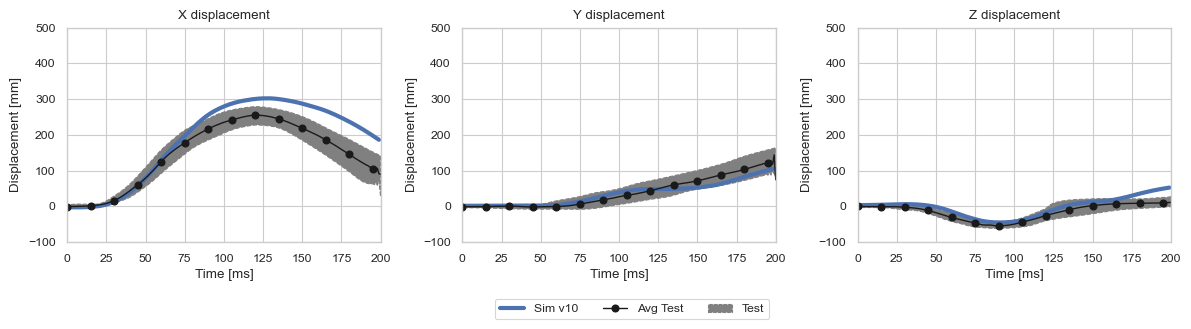

In [45]:
Sim_ISO['T1_x_disp.csv'] = sim_output[Tests[0]].SLED.T1_Disp_x.displacement.iloc[350:475]-sim_output[Tests[0]].SLED.T1_Disp_x.displacement.iloc[350]-sim_output[Tests[0]].SLED.Sled_Disp_x.displacement.iloc[350:475]
Sim_ISO['T1_y_disp.csv'] = sim_output[Tests[0]].SLED.T1_Disp_y.displacement.iloc[350:475]-sim_output[Tests[0]].SLED.T1_Disp_y.displacement.iloc[350]
Sim_ISO['T1_z_disp.csv'] = sim_output[Tests[0]].SLED.T1_Disp_z.displacement.iloc[350:475]-sim_output[Tests[0]].SLED.T1_Disp_z.displacement.iloc[350]

Test_avg = {"linestyle" :'-', "color" : 'k',"alpha" :1,"linewidth":1, 'marker' :"o", 'markevery': 15}
fig_Kin, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,3))
for i in range(0,3):
    ax[i].set_ylabel('Displacement [mm]');
    ax[i].set_xlabel('Time [ms]');
ax[0].plot(sim_output[Tests[0]].SLED.T1_Disp_x.time-350., sim_output[Tests[0]].SLED.T1_Disp_x.displacement-sim_output[Tests[0]].SLED.Sled_Disp_x.displacement+10, **s10,label='SAFER10.0')
ax[0].plot(exp['kinematics.csv']['time'], exp['kinematics.csv'][' t1Xm'],**Test_avg)
ax[0].fill_between(exp['kinematics.csv']['time'],exp['kinematics.csv'][' t1Xu'],exp['kinematics.csv'][' t1Xl'],**test_corr)
ax[0].set_xlim(0,200)
ax[0].set_ylim(-100 ,500)
ax[0].set_title('X displacement')


ax[1].plot(sim_output[Tests[0]].SLED.T1_Disp_y.time-350., sim_output[Tests[0]].SLED.T1_Disp_y.displacement,**s10)
ax[1].plot(exp['kinematics.csv']['time'], exp['kinematics.csv'][' t1Ym'],**Test_avg)
ax[1].fill_between(exp['kinematics.csv']['time'],exp['kinematics.csv'][' t1Yu'],exp['kinematics.csv'][' t1Yl'],**test_corr)
ax[1].set_ylim(-100 ,500)
ax[1].set_xlim(0,200)
ax[1].set_title('Y displacement')

ax[2].plot(sim_output[Tests[0]].SLED.T1_Disp_z.time-350., sim_output[Tests[0]].SLED.T1_Disp_z.displacement-45,**s10)
ax[2].plot(exp['kinematics.csv']['time'], exp['kinematics.csv'][' t1Zm'],**Test_avg)
ax[2].fill_between(exp['kinematics.csv']['time'],exp['kinematics.csv'][' t1Zu'],exp['kinematics.csv'][' t1Zl'],**test_corr)
ax[2].set_ylim(-100 ,500)
ax[2].set_xlim(0,200)
ax[2].set_title('Z displacement')
fig_Kin.legend(['Sim v10', 'Avg Test', 'Test'],bbox_to_anchor=(0.65,0.01),ncols=4)
fig_Kin.tight_layout()
fig_Kin.savefig(os.path.join(figures_dir, 'Figure_v10.0_{}.jpg'.format(pd.to_datetime('today').strftime('%Y%m%d_%H%M%S'))), transparent=False, dpi=600, bbox_inches="tight")


#### T8-Kinamatics

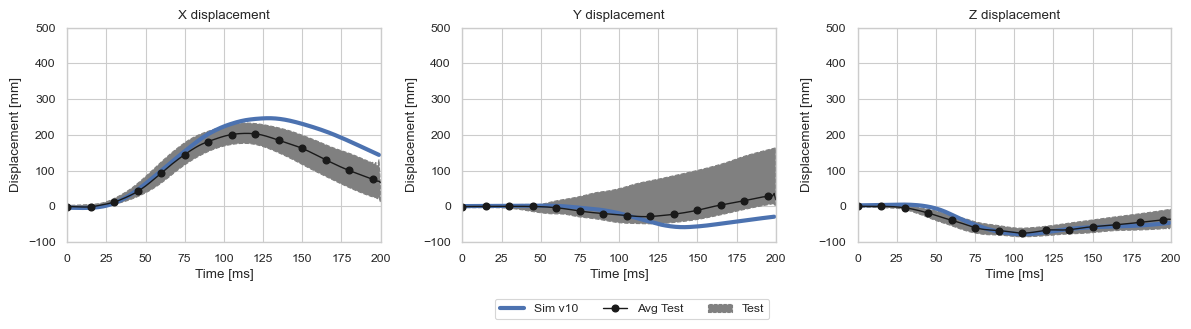

In [46]:
Sim_ISO['T8_x_disp.csv'] = sim_output[Tests[0]].SLED.T8_Disp_x.displacement.iloc[350:475]-sim_output[Tests[0]].SLED.T8_Disp_x.displacement.iloc[350]-sim_output[Tests[0]].SLED.Sled_Disp_x.displacement.iloc[350:475]
Sim_ISO['T8_y_disp.csv'] = sim_output[Tests[0]].SLED.T8_Disp_y.displacement.iloc[350:475]-sim_output[Tests[0]].SLED.T8_Disp_y.displacement.iloc[350]
Sim_ISO['T8_z_disp.csv'] = sim_output[Tests[0]].SLED.T8_Disp_z.displacement.iloc[350:475]-sim_output[Tests[0]].SLED.T8_Disp_z.displacement.iloc[350]


Test_avg = {"linestyle" :'-', "color" : 'k',"alpha" :1,"linewidth":1, 'marker' :"o", 'markevery': 15}
fig_Kin, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,3))
for i in range(0,3):
    ax[i].set_ylabel('Displacement [mm]');
    ax[i].set_xlabel('Time [ms]');
ax[0].plot(sim_output[Tests[0]].SLED.T8_Disp_x.time-350., sim_output[Tests[0]].SLED.T8_Disp_x.displacement-sim_output[Tests[0]].SLED.Sled_Disp_x.displacement+15, **s10)
ax[0].plot(exp['kinematics.csv']['time'], exp['kinematics.csv'][' t8Xm'],**Test_avg)
ax[0].fill_between(exp['kinematics.csv']['time'],exp['kinematics.csv'][' t8Xu'],exp['kinematics.csv'][' t8Xl'],**test_corr)
ax[0].set_xlim(0,200)
ax[0].set_ylim(-100 ,500)
ax[0].set_title('X displacement')


ax[1].plot(sim_output[Tests[0]].SLED.T8_Disp_y.time-350., sim_output[Tests[0]].SLED.T8_Disp_y.displacement,**s10)
ax[1].plot(exp['kinematics.csv']['time'], exp['kinematics.csv'][' t8Ym'],**Test_avg)
ax[1].fill_between(exp['kinematics.csv']['time'],exp['kinematics.csv'][' t1Yu'],exp['kinematics.csv'][' t8Yl'],**test_corr)
ax[1].set_ylim(-100 ,500)
ax[1].set_xlim(0,200)
ax[1].set_title('Y displacement')

ax[2].plot(sim_output[Tests[0]].SLED.T8_Disp_z.time-350., sim_output[Tests[0]].SLED.T8_Disp_z.displacement -45,**s10)
ax[2].plot(exp['kinematics.csv']['time'], exp['kinematics.csv'][' t8Zm'],**Test_avg)
ax[2].fill_between(exp['kinematics.csv']['time'],exp['kinematics.csv'][' t8Zu'],exp['kinematics.csv'][' t8Zl'],**test_corr)
ax[2].set_ylim(-100 ,500)
ax[2].set_xlim(0,200)
ax[2].set_title('Z displacement')
fig_Kin.legend(['Sim v10', 'Avg Test', 'Test'],bbox_to_anchor=(0.65,0.01),ncols=4)
fig_Kin.tight_layout()
fig_Kin.savefig(os.path.join(figures_dir, 'Figure_v10.0_{}.jpg'.format(pd.to_datetime('today').strftime('%Y%m%d_%H%M%S'))), transparent=False, dpi=600, bbox_inches="tight")


#### L2-Kinamatics

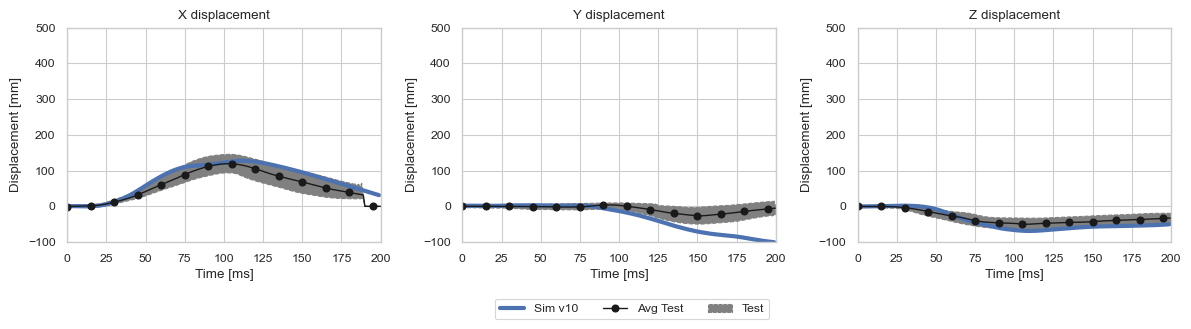

In [47]:
Sim_ISO['L2_x_disp.csv'] = sim_output[Tests[0]].SLED.L2_Disp_x.displacement.iloc[350:475]-sim_output[Tests[0]].SLED.L2_Disp_x.displacement.iloc[350]-sim_output[Tests[0]].SLED.Sled_Disp_x.displacement.iloc[350:475]
Sim_ISO['L2_y_disp.csv'] = sim_output[Tests[0]].SLED.L2_Disp_y.displacement.iloc[350:475]-sim_output[Tests[0]].SLED.L2_Disp_y.displacement.iloc[350]
Sim_ISO['L2_z_disp.csv'] = sim_output[Tests[0]].SLED.L2_Disp_z.displacement.iloc[350:475]-sim_output[Tests[0]].SLED.L2_Disp_z.displacement.iloc[350]

Test_avg = {"linestyle" :'-', "color" : 'k',"alpha" :1,"linewidth":1, 'marker' :"o", 'markevery': 15}
fig_Kin, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,3))
for i in range(0,3):
    ax[i].set_ylabel('Displacement [mm]');
    ax[i].set_xlabel('Time [ms]');
ax[0].plot(sim_output[Tests[0]].SLED.L2_Disp_x.time-350., sim_output[Tests[0]].SLED.L2_Disp_x.displacement-sim_output[Tests[0]].SLED.Sled_Disp_x.displacement+10, **s10)
ax[0].plot(exp['kinematics.csv']['time'], exp['kinematics.csv'][' l2Xm'],**Test_avg)
ax[0].fill_between(exp['kinematics.csv']['time'],exp['kinematics.csv'][' l2Xu'],exp['kinematics.csv'][' l2Xl'],**test_corr)
ax[0].set_xlim(0,200)
ax[0].set_ylim(-100 ,500)
ax[0].set_title('X displacement')


ax[1].plot(sim_output[Tests[0]].SLED.L2_Disp_y.time-350., sim_output[Tests[0]].SLED.L2_Disp_y.displacement,**s10)
ax[1].plot(exp['kinematics.csv']['time'], exp['kinematics.csv'][' l2Ym'],**Test_avg)
ax[1].fill_between(exp['kinematics.csv']['time'],exp['kinematics.csv'][' l2Yu'],exp['kinematics.csv'][' l2Yl'],**test_corr)
ax[1].set_ylim(-100 ,500)
ax[1].set_xlim(0,200)
ax[1].set_title('Y displacement')

ax[2].plot(sim_output[Tests[0]].SLED.L2_Disp_z.time-350., sim_output[Tests[0]].SLED.L2_Disp_z.displacement-45,**s10)
ax[2].plot(exp['kinematics.csv']['time'], exp['kinematics.csv'][' l2Zm'],**Test_avg)
ax[2].fill_between(exp['kinematics.csv']['time'],exp['kinematics.csv'][' l2Zu'],exp['kinematics.csv'][' l2Zl'],**test_corr)
ax[2].set_ylim(-100 ,500)
ax[2].set_xlim(0,200)
ax[2].set_title('Z displacement')
fig_Kin.legend(['Sim v10', 'Avg Test', 'Test'],bbox_to_anchor=(0.65,0.01),ncols=4)
fig_Kin.tight_layout()
fig_Kin.savefig(os.path.join(figures_dir, 'Figure_v10.0_{}.jpg'.format(pd.to_datetime('today').strftime('%Y%m%d_%H%M%S'))), transparent=False, dpi=600, bbox_inches="tight")

#### L4-Kinamatics

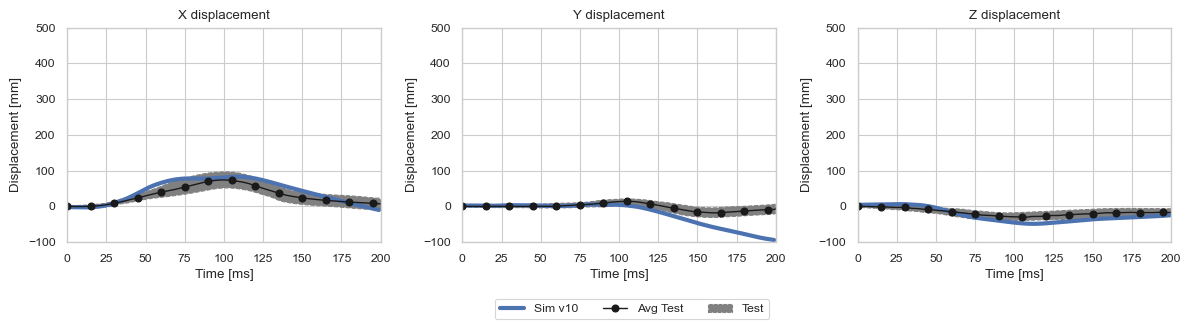

In [48]:
Sim_ISO['L4_x_disp.csv'] = sim_output[Tests[0]].SLED.L4_Disp_x.displacement.iloc[350:475]-sim_output[Tests[0]].SLED.L4_Disp_x.displacement.iloc[350]-sim_output[Tests[0]].SLED.Sled_Disp_x.displacement.iloc[350:475]
Sim_ISO['L4_y_disp.csv'] = sim_output[Tests[0]].SLED.L4_Disp_y.displacement.iloc[350:475]-sim_output[Tests[0]].SLED.L4_Disp_y.displacement.iloc[350]
Sim_ISO['L4_z_disp.csv'] = sim_output[Tests[0]].SLED.L4_Disp_z.displacement.iloc[350:475]-sim_output[Tests[0]].SLED.L4_Disp_z.displacement.iloc[350]

Test_avg = {"linestyle" :'-', "color" : 'k',"alpha" :1,"linewidth":1, 'marker' :"o", 'markevery': 15}
fig_Kin, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,3))
for i in range(0,3):
    ax[i].set_ylabel('Displacement [mm]');
    ax[i].set_xlabel('Time [ms]');
ax[0].plot(sim_output[Tests[0]].SLED.L4_Disp_x.time-350., sim_output[Tests[0]].SLED.L4_Disp_x.displacement-sim_output[Tests[0]].SLED.Sled_Disp_x.displacement, **s10)
ax[0].plot(exp['kinematics.csv']['time'], exp['kinematics.csv'][' l4Xm'],**Test_avg)
ax[0].fill_between(exp['kinematics.csv']['time'],exp['kinematics.csv'][' l4Xu'],exp['kinematics.csv'][' l4Xl'],**test_corr)
ax[0].set_xlim(0,200)
ax[0].set_ylim(-100 ,500)
ax[0].set_title('X displacement')


ax[1].plot(sim_output[Tests[0]].SLED.L4_Disp_y.time-350., sim_output[Tests[0]].SLED.L4_Disp_y.displacement,**s10)
ax[1].plot(exp['kinematics.csv']['time'], exp['kinematics.csv'][' l4Ym'],**Test_avg)
ax[1].fill_between(exp['kinematics.csv']['time'],exp['kinematics.csv'][' l4Yu'],exp['kinematics.csv'][' l4Yl'],**test_corr)
ax[1].set_ylim(-100 ,500)
ax[1].set_xlim(0,200)
ax[1].set_title('Y displacement')

ax[2].plot(sim_output[Tests[0]].SLED.L4_Disp_z.time-350., sim_output[Tests[0]].SLED.L4_Disp_z.displacement-35,**s10)
ax[2].plot(exp['kinematics.csv']['time'], exp['kinematics.csv'][' l4Zm'],**Test_avg)
ax[2].fill_between(exp['kinematics.csv']['time'],exp['kinematics.csv'][' l4Zu'],exp['kinematics.csv'][' l4Zl'],**test_corr)
ax[2].set_ylim(-100 ,500)
ax[2].set_xlim(0,200)
ax[2].set_title('Z displacement')
fig_Kin.legend(['Sim v10', 'Avg Test', 'Test'],bbox_to_anchor=(0.65,0.01),ncols=4)
fig_Kin.tight_layout()
fig_Kin.savefig(os.path.join(figures_dir, 'Figure_v10.0_{}.jpg'.format(pd.to_datetime('today').strftime('%Y%m%d_%H%M%S'))), transparent=False, dpi=600, bbox_inches="tight")

#### Left Acromion-Kinamatics

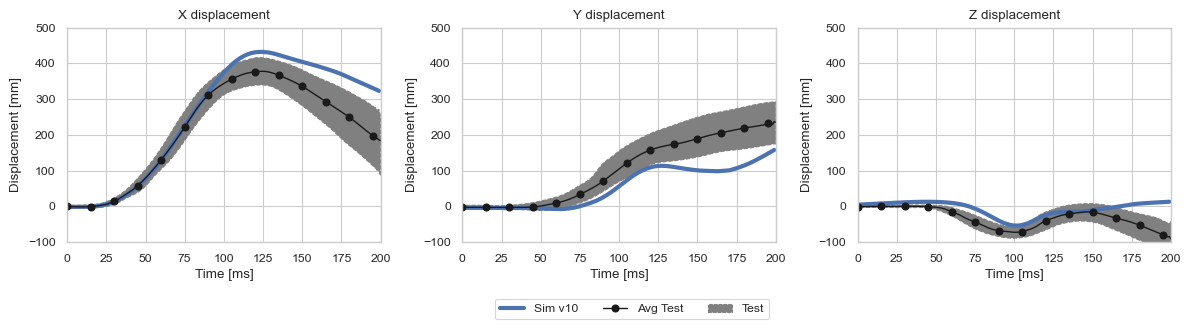

In [49]:
Sim_ISO['LS_x_disp.csv'] = sim_output[Tests[0]].SLED.L_shoulder_Disp_x.displacement.iloc[350:475]-sim_output[Tests[0]].SLED.L_shoulder_Disp_x.displacement.iloc[350]-sim_output[Tests[0]].SLED.Sled_Disp_x.displacement.iloc[350:475]
Sim_ISO['LS_y_disp.csv'] = sim_output[Tests[0]].SLED.L_shoulder_Disp_y.displacement.iloc[350:475]-sim_output[Tests[0]].SLED.L_shoulder_Disp_y.displacement.iloc[350]
Sim_ISO['LS_z_disp.csv'] = sim_output[Tests[0]].SLED.L_shoulder_Disp_z.displacement.iloc[350:475]-sim_output[Tests[0]].SLED.L_shoulder_Disp_z.displacement.iloc[350]


Test_avg = {"linestyle" :'-', "color" : 'k',"alpha" :1,"linewidth":1, 'marker' :"o", 'markevery': 15}
fig_Kin, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,3))
for i in range(0,3):
    ax[i].set_ylabel('Displacement [mm]');
    ax[i].set_xlabel('Time [ms]');
ax[0].plot(sim_output[Tests[0]].SLED.L_shoulder_Disp_x.time-350., sim_output[Tests[0]].SLED.L_shoulder_Disp_x.displacement-sim_output[Tests[0]].SLED.Sled_Disp_x.displacement, **s10)
ax[0].plot(exp['kinematics.csv']['time'], exp['kinematics.csv'][' laXm'],**Test_avg)
ax[0].fill_between(exp['kinematics.csv']['time'],exp['kinematics.csv'][' laXu'],exp['kinematics.csv'][' laXl'],**test_corr)
ax[0].set_xlim(0,200)
ax[0].set_ylim(-100 ,500)
ax[0].set_title('X displacement')


ax[1].plot(sim_output[Tests[0]].SLED.L_shoulder_Disp_y.time-350., sim_output[Tests[0]].SLED.L_shoulder_Disp_y.displacement,**s10)
ax[1].plot(exp['kinematics.csv']['time'], exp['kinematics.csv'][' laYm'],**Test_avg)
ax[1].fill_between(exp['kinematics.csv']['time'],exp['kinematics.csv'][' laYu'],exp['kinematics.csv'][' laYl'],**test_corr)
ax[1].set_ylim(-100 ,500)
ax[1].set_xlim(0,200)
ax[1].set_title('Y displacement')

ax[2].plot(sim_output[Tests[0]].SLED.L_shoulder_Disp_z.time-350., sim_output[Tests[0]].SLED.L_shoulder_Disp_z.displacement-42,**s10)
ax[2].plot(exp['kinematics.csv']['time'], exp['kinematics.csv'][' laZm'],**Test_avg)
ax[2].fill_between(exp['kinematics.csv']['time'],exp['kinematics.csv'][' laZu'],exp['kinematics.csv'][' laZl'],**test_corr)
ax[2].set_ylim(-100 ,500)
ax[2].set_xlim(0,200)
ax[2].set_title('Z displacement')
fig_Kin.legend(['Sim v10', 'Avg Test', 'Test'],bbox_to_anchor=(0.65,0.01),ncols=4)
fig_Kin.tight_layout()
fig_Kin.savefig(os.path.join(figures_dir, 'Figure_v10.0_{}.jpg'.format(pd.to_datetime('today').strftime('%Y%m%d_%H%M%S'))), transparent=False, dpi=600, bbox_inches="tight")

#### Right Acromion-Kinamatics

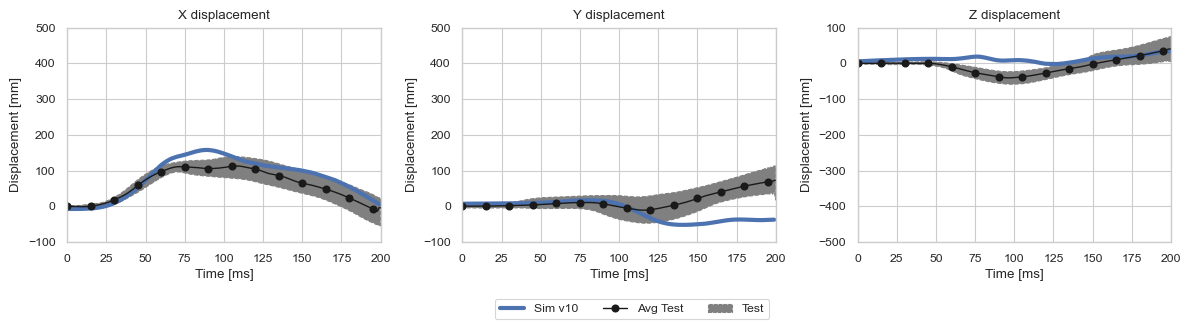

In [50]:
Sim_ISO['RS_x_disp.csv'] = sim_output[Tests[0]].SLED.R_shoulder_Disp_x.displacement.iloc[350:475]-sim_output[Tests[0]].SLED.R_shoulder_Disp_x.displacement.iloc[350]-sim_output[Tests[0]].SLED.Sled_Disp_x.displacement.iloc[350:475]
Sim_ISO['RS_y_disp.csv'] = sim_output[Tests[0]].SLED.R_shoulder_Disp_y.displacement.iloc[350:475]-sim_output[Tests[0]].SLED.R_shoulder_Disp_y.displacement.iloc[350]
Sim_ISO['RS_z_disp.csv'] = sim_output[Tests[0]].SLED.R_shoulder_Disp_z.displacement.iloc[350:475]-sim_output[Tests[0]].SLED.R_shoulder_Disp_z.displacement.iloc[350]

Test_avg = {"linestyle" :'-', "color" : 'k',"alpha" :1,"linewidth":1, 'marker' :"o", 'markevery': 15}
fig_Kin, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,3))
for i in range(0,3):
    ax[i].set_ylabel('Displacement [mm]');
    ax[i].set_xlabel('Time [ms]');
ax[0].plot(sim_output[Tests[0]].SLED.R_shoulder_Disp_x.time-350., sim_output[Tests[0]].SLED.R_shoulder_Disp_x.displacement-sim_output[Tests[0]].SLED.Sled_Disp_x.displacement, **s10)
ax[0].plot(exp['kinematics.csv']['time'], exp['kinematics.csv'][' raXm'],**Test_avg)
ax[0].fill_between(exp['kinematics.csv']['time'],exp['kinematics.csv'][' raXu'],exp['kinematics.csv'][' raXl'],**test_corr)
ax[0].set_xlim(0,200)
ax[0].set_ylim(-100 ,500)
ax[0].set_title('X displacement')


ax[1].plot(sim_output[Tests[0]].SLED.R_shoulder_Disp_y.time-350., sim_output[Tests[0]].SLED.R_shoulder_Disp_y.displacement,**s10)
ax[1].plot(exp['kinematics.csv']['time'], exp['kinematics.csv'][' raYm'],**Test_avg)
ax[1].fill_between(exp['kinematics.csv']['time'],exp['kinematics.csv'][' raYu'],exp['kinematics.csv'][' raYl'],**test_corr)
ax[1].set_ylim(-100 ,500)
ax[1].set_xlim(0,200)
ax[1].set_title('Y displacement')

ax[2].plot(sim_output[Tests[0]].SLED.R_shoulder_Disp_z.time-350., sim_output[Tests[0]].SLED.R_shoulder_Disp_z.displacement-42,**s10)
ax[2].plot(exp['kinematics.csv']['time'], exp['kinematics.csv'][' raZm'],**Test_avg)
ax[2].fill_between(exp['kinematics.csv']['time'],exp['kinematics.csv'][' raZu'],exp['kinematics.csv'][' raZl'],**test_corr)
ax[2].set_ylim(-500 ,100)
ax[2].set_xlim(0,200)
ax[2].set_title('Z displacement')
fig_Kin.legend(['Sim v10', 'Avg Test', 'Test'],bbox_to_anchor=(0.65,0.01),ncols=4)
fig_Kin.tight_layout()
fig_Kin.savefig(os.path.join(figures_dir, 'Figure_v10.0_{}.jpg'.format(pd.to_datetime('today').strftime('%Y%m%d_%H%M%S'))), transparent=False, dpi=600, bbox_inches="tight")

#### Pelvis-Kinamatics

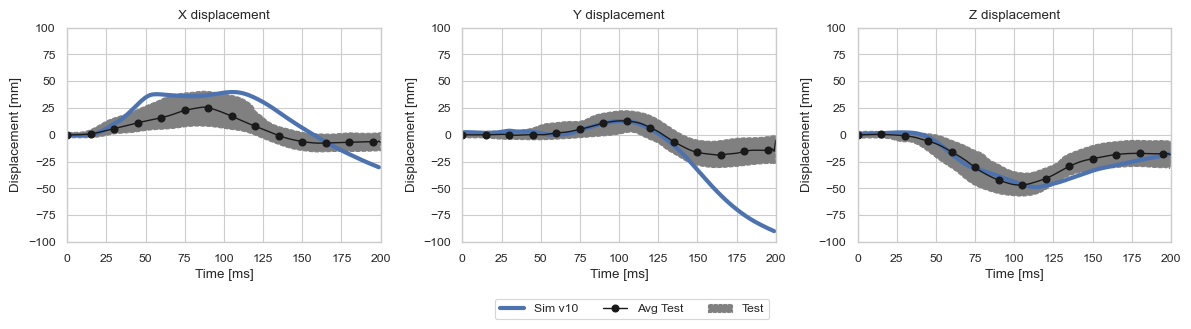

In [51]:
Sim_ISO['Pelvis_x_disp.csv'] = sim_output[Tests[0]].SLED.Pelvis_Disp_x.displacement.iloc[350:475]-sim_output[Tests[0]].SLED.Pelvis_Disp_x.displacement.iloc[350]-sim_output[Tests[0]].SLED.Sled_Disp_x.displacement.iloc[350:475]
Sim_ISO['Pelvis_y_disp.csv'] = sim_output[Tests[0]].SLED.Pelvis_Disp_y.displacement.iloc[350:475]-sim_output[Tests[0]].SLED.Pelvis_Disp_y.displacement.iloc[350]
Sim_ISO['Pelvis_z_disp.csv'] = sim_output[Tests[0]].SLED.Pelvis_Disp_z.displacement.iloc[350:475]-sim_output[Tests[0]].SLED.Pelvis_Disp_z.displacement.iloc[350]

Test_avg = {"linestyle" :'-', "color" : 'k',"alpha" :1,"linewidth":1, 'marker' :"o", 'markevery': 15}
fig_Kin, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,3))
for i in range(0,3):
    ax[i].set_ylabel('Displacement [mm]');
    ax[i].set_xlabel('Time [ms]');
ax[0].plot(sim_output[Tests[0]].SLED.Pelvis_Disp_x.time-350., sim_output[Tests[0]].SLED.Pelvis_Disp_x.displacement-sim_output[Tests[0]].SLED.Pelvis_Disp_x.displacement.iloc[350]-sim_output[Tests[0]].SLED.Sled_Disp_x.displacement, **s10)
ax[0].plot(exp['kinematics.csv']['time'], exp['kinematics.csv'][' pXm'],**Test_avg)
ax[0].fill_between(exp['kinematics.csv']['time'],exp['kinematics.csv'][' pXu'],exp['kinematics.csv'][' pXl'],**test_corr)
ax[0].set_xlim(0,200)
ax[0].set_ylim(-100 ,100)
ax[0].set_title('X displacement')


ax[1].plot(sim_output[Tests[0]].SLED.Pelvis_Disp_y.time-350., sim_output[Tests[0]].SLED.Pelvis_Disp_y.displacement,**s10)
ax[1].plot(exp['kinematics.csv']['time'], exp['kinematics.csv'][' pYm'],**Test_avg)
ax[1].fill_between(exp['kinematics.csv']['time'],exp['kinematics.csv'][' pYu'],exp['kinematics.csv'][' pYl'],**test_corr)
ax[1].set_ylim(-100 ,100)
ax[1].set_xlim(0,200)
ax[1].set_title('Y displacement')

ax[2].plot(sim_output[Tests[0]].SLED.Pelvis_Disp_z.time-350., sim_output[Tests[0]].SLED.Pelvis_Disp_z.displacement-35,**s10)
ax[2].plot(exp['kinematics.csv']['time'], exp['kinematics.csv'][' pZm'],**Test_avg)
ax[2].fill_between(exp['kinematics.csv']['time'],exp['kinematics.csv'][' pZu'],exp['kinematics.csv'][' pZl'],**test_corr)
ax[2].set_ylim(-100 ,100)
ax[2].set_xlim(0,200)
ax[2].set_title('Z displacement')
fig_Kin.legend(['Sim v10', 'Avg Test', 'Test'],bbox_to_anchor=(0.65,0.01),ncols=4)
fig_Kin.tight_layout()
fig_Kin.savefig(os.path.join(figures_dir, 'Figure_v10.0_{}.jpg'.format(pd.to_datetime('today').strftime('%Y%m%d_%H%M%S'))), transparent=False, dpi=600, bbox_inches="tight")

#### Chest Compression x-dir

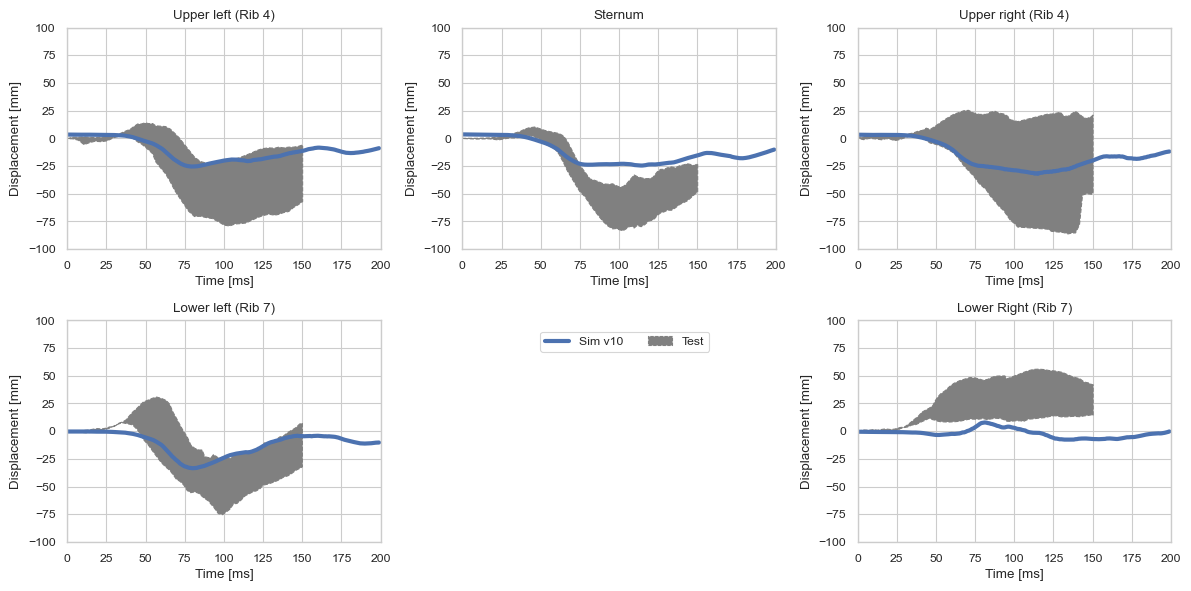

In [52]:
Test_avg = {"linestyle" :'-', "color" : 'k',"alpha" :1,"linewidth":1, 'marker' :"o", 'markevery': 15}
fig_Kin, ax = plt.subplots(nrows=2, ncols=3, figsize=(12,6))
for i in range(0,2):
    for j in range(0,3):
        ax[i,j].set_ylabel('Displacement [mm]');
        ax[i,j].set_xlabel('Time [ms]');
ax[1,0].plot(sim_output[Tests[0]].SLED.Lower_left_Disp_x.time-350., sim_output[Tests[0]].SLED.Lower_left_Disp_x.displacement+5, **s10)
factor = np.shape(exp['Lower_left_chest_x_high.txt'][1])[0]/np.shape(exp['Lower_left_chest_x_low.txt'][1])[0]
tmp = ndimage.zoom(exp['Lower_left_chest_x_low.txt'][1],factor)
ax[1,0].fill_between(exp['Lower_left_chest_x_high.txt'][0],exp['Lower_left_chest_x_high.txt'][1],tmp,**test_corr)
ax[1,0].set_xlim(0,200)
ax[1,0].set_ylim(-100 ,100)
ax[1,0].set_title('Lower left (Rib 7)')


ax[1,2].plot(sim_output[Tests[0]].SLED.Lower_right_Disp_x.time-350., sim_output[Tests[0]].SLED.Lower_right_Disp_x.displacement+5,**s10)
factor = np.shape(exp['Lower_right_chest_x_high.txt'][1])[0]/np.shape(exp['Lower_right_chest_x_low.txt'][1])[0]
tmp = ndimage.zoom(exp['Lower_right_chest_x_low.txt'][1],factor)
ax[1,2].fill_between(exp['Lower_right_chest_x_high.txt'][0],exp['Lower_right_chest_x_high.txt'][1],tmp,**test_corr)
ax[1,2].set_xlim(0,200)
ax[1,2].set_ylim(-100 ,100)
ax[1,2].set_title('Lower Right (Rib 7)')

ax[0,0].plot(sim_output[Tests[0]].SLED.Upper_left_Disp_x.time-350., sim_output[Tests[0]].SLED.Upper_left_Disp_x.displacement+10,**s10)
factor = np.shape(exp['Upper_left_chest_x_high.txt'][1])[0]/np.shape(exp['Upper_left_chest_x_low.txt'][1])[0]
tmp = ndimage.zoom(exp['Upper_left_chest_x_low.txt'][1],factor)
ax[0,0].fill_between(exp['Upper_left_chest_x_high.txt'][0],exp['Upper_left_chest_x_high.txt'][1],tmp,**test_corr)
ax[0,0].set_xlim(0,200)
ax[0,0].set_ylim(-100 ,100)
ax[0,0].set_title('Upper left (Rib 4)')

ax[0,2].plot(sim_output[Tests[0]].SLED.Upper_right_Disp_x.time-350., sim_output[Tests[0]].SLED.Upper_right_Disp_x.displacement+10,**s10)
factor = np.shape(exp['Upper_right_chest_x_high.txt'][1])[0]/np.shape(exp['Upper_right_chest_x_low.txt'][1])[0]
tmp = ndimage.zoom(exp['Upper_right_chest_x_low.txt'][1],factor)
ax[0,2].fill_between(exp['Upper_right_chest_x_high.txt'][0],exp['Upper_right_chest_x_high.txt'][1],tmp,**test_corr)
ax[0,2].set_xlim(0,200)
ax[0,2].set_ylim(-100 ,100)
ax[0,2].set_title('Upper right (Rib 4)')


# -sim_output[Tests[0]].SLED.T8_Disp_x.displacement
ax[0,1].plot(sim_output[Tests[0]].SLED.Sternum_Disp_x.time-350.,sim_output[Tests[0]].SLED.Sternum_Disp_x.displacement+10,**s10)
factor = np.shape(exp['Sternum_relT8_x_high.txt'][1])[0]/np.shape(exp['Sternum_relT8_x_low.txt'][1])[0]
tmp = ndimage.zoom(exp['Sternum_relT8_x_low.txt'][1],factor)
ax[0,1].fill_between(exp['Sternum_relT8_x_high.txt'][0],exp['Sternum_relT8_x_high.txt'][1],tmp,**test_corr)
ax[0,1].set_xlim(0,200)
ax[0,1].set_ylim(-100 ,100)
ax[0,1].set_title('Sternum')


fig_Kin.legend(['Sim v10', 'Test'],bbox_to_anchor=(0.6,0.45),ncols=4)
fig_Kin.delaxes(ax[1,1])
fig_Kin.tight_layout()
fig_Kin.savefig(os.path.join(figures_dir, 'Figure_v10.0_{}.jpg'.format(pd.to_datetime('today').strftime('%Y%m%d_%H%M%S'))), transparent=False, dpi=600, bbox_inches="tight")

### Energies

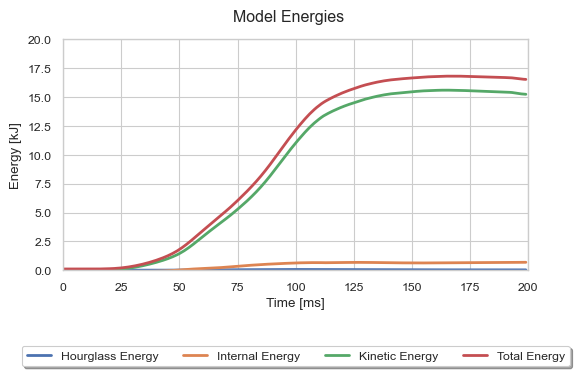

In [53]:
fig_energy, axs = plt.subplots(nrows=1, ncols=1, figsize=(6,3))
fig_energy.suptitle('Model Energies')
#plt.set_title('Simulation #1')
#plt.set_ylabel('Energies (J)')
plt.plot(sim_output[Tests[0]].MODEL.Hourglass_Energy.time-350, sim_output[Tests[0]].MODEL.Hourglass_Energy.energy/1000, linewidth = 2,label = "Hourglass Energy")
plt.plot(sim_output[Tests[0]].MODEL.Internal_Energy.time-350, sim_output[Tests[0]].MODEL.Internal_Energy.energy/1000,linewidth = 2, label = "Internal Energy")
plt.plot(sim_output[Tests[0]].MODEL.Kinetic_Energy.time-350, sim_output[Tests[0]].MODEL.Kinetic_Energy.energy/1000,linewidth = 2, label = "Kinetic Energy")
plt.plot(sim_output[Tests[0]].MODEL.Total_Energy.time-350, sim_output[Tests[0]].MODEL.Total_Energy.energy/1000,linewidth = 2, label = "Total Energy")

plt.xlabel("Time [ms]") 
plt.ylabel("Energy [kJ]")
plt.xlim([0,200])
plt.ylim([0,20])
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.3),
          fancybox=True, shadow=True, ncol=4)
filename_save = os.path.join(figures_dir, 'Forman_2006_energies.svg')
fig_energy.savefig(filename_save, format='svg', bbox_inches='tight')
filename_save = os.path.join(figures_dir, 'Forman_2004_energies.png')
fig_energy.savefig(filename_save, format='png', bbox_inches='tight')

## ISO18571 objective rating for force-time histories

The ISO score is obtained at the time of peak shoulder belt force + 20% (125ms) 

In [54]:
# Import objective rating metric library
from objective_rating_metrics.rating import ISO18571

In [62]:
def resam(xdata,ydata,endtime):
    x = xdata
    y = ydata
    # Interpolate the data to the desired length
    newx = np.arange(0,endtime,0.1)#10kHz resolution
    newy = np.interp(newx, x, y)
    return np.array(newy).flatten()
Sim_ISO['Time'] = sim_output[Tests[0]].BELT.Belt_force_Shoulder_upper.time[350:475] - 350
test_avg = {}
T_samp=np.arange(0,200,0.1)
GS2_Measures=pd.DataFrame(Sim_ISO.keys())[pd.DataFrame(Sim_ISO.keys())!='Time'].dropna()
df_res = pd.DataFrame(columns=['Measure','Corridor Score', 'Phase Score', 'Magnitude Score', 'Slope Score', 'Overall Score'])
i = 0
Test_ = ['Upper_shoulder_belt','Lower_shoulder_belt','Head_x_disp.csv','Head_y_disp.csv','Head_z_disp.csv',' t1Xm',' t1Ym',' t1Zm',' t8Xm',' t8Ym',' t8Zm',' l2Xm',' l2Ym',' l2Zm',
         ' l4Xm',' l4Ym',' l4Zm',' laXm',' laYm',' laZm',' raXm',' raYm',' raZm',' pXm',' pYm',' pZm']
for measure in GS2_Measures[0]: 
    sim_t=np.array(Sim_ISO['Time']).flatten()
    sim_v=np.array(Sim_ISO[measure]).flatten()
    if i < 2:
        test_avg[measure] = resam(T_samp,exp[Test_[i]],200)
    elif i < 5:
        test_avg[measure] = resam(exp[Test_[i]][0],exp[Test_[i]][1],200)
    else:
        test_avg[measure] = resam(exp['kinematics.csv']['time'],exp['kinematics.csv'][Test_[i]],200)
    ref = np.vstack((T_samp[0:1250], test_avg[measure][0:1250])).T
    s_v=resam(sim_t,sim_v,125)
    sim = np.vstack((T_samp[0:1250], s_v)).T
    iso_rating = ISO18571(reference_curve=ref, comparison_curve=sim)
    df_rate = pd.DataFrame(columns=['Measure','Corridor Score', 'Phase Score', 'Magnitude Score', 'Slope Score', 'Overall Score'])
    df_rate['Measure']=[measure]
    df_rate['Corridor Score']=[iso_rating.corridor_rating()]
    df_rate['Phase Score']=[iso_rating.phase_rating()]
    df_rate['Magnitude Score']=[iso_rating.magnitude_rating()]
    df_rate['Slope Score']=[iso_rating.slope_rating()]
    df_rate['Overall Score']=[iso_rating.overall_rating()]
    df_res=pd.concat([df_res,df_rate], ignore_index=True)
    i = i + 1

#### ISO for Kinetics

In [63]:
tmp = 0
for i in range(0,2):
    tmp = tmp + df_res[0:2]['Overall Score'][i]
avg_kinetic = tmp/2
print('Overall Average for Kinetics: '+ str(avg_kinetic.round(2)))
df_res[0:2]

Overall Average for Kinetics: 0.84


,Measure,Corridor Score,Phase Score,Magnitude Score,Slope Score,Overall Score
0,Upper_shoulder_belt,0.811,0.880,0.890,0.601,0.799
1,Lower_shoulder_belt,0.875,0.948,0.926,0.749,0.875


#### ISO for Kinematics

In [64]:
tmp = 0
for i in range(2,len(Test_)):
    tmp = tmp + df_res[2:len(Test_)]['Overall Score'][i]
avg_kinematic = tmp/(len(Test_)-2)
min_kinematic = min(df_res[2:len(Test_)]['Overall Score'])
max_kinematic = max(df_res[2:len(Test_)]['Overall Score'])
print('Overall Average for Kinematics: '+ str(avg_kinematic.round(2)))
print('Overall range for Kinematics: '+ str(round(min_kinematic,2))+' to '+str(round(max_kinematic,2)))
df_res[2:]

Overall Average for Kinematics: 0.65
Overall range for Kinematics: 0.25 to 0.9


,Measure,Corridor Score,Phase Score,Magnitude Score,Slope Score,Overall Score
2,Head_x_disp.csv,0.928,0.864,0.900,0.890,0.902
3,Head_y_disp.csv,0.716,0.272,0.914,0.891,0.702
4,Head_z_disp.csv,0.938,0.896,0.794,0.834,0.880
5,T1_x_disp.csv,0.815,0.860,0.823,0.889,0.840
6,T1_y_disp.csv,0.804,0.692,0.937,0.825,0.812
7,T1_z_disp.csv,0.725,0.856,0.864,0.842,0.803
8,T8_x_disp.csv,0.841,0.884,0.838,0.883,0.857
9,T8_y_disp.csv,0.643,0.000,0.149,0.422,0.371
10,T8_z_disp.csv,0.806,0.680,0.931,0.802,0.805
11,L2_x_disp.csv,0.815,0.764,0.929,0.746,0.814


## Strain based rib fractures

In [26]:
from math import erf
from fast_poibin import PoiBin

In [27]:
age = [76,47,54,49,57,72,40,37]
T2p = 100
T3p = 87.5
Test_num = [1294,1295,1358,1359,1360,1378,1379,1380]
def Rib_fx (strain, age):
    # input strain in float and age in years
   risk=0.5*(1+erf((np.log(strain)-(-2.9802-0.0130*age))/(0.32026*2**0.5)))
   return risk

def calculate_injury_matrix(test,age,T2p,T3p,Test_num):
    # -------------------------------Pick Peak maximum principal strain and calculate risks------------------------------------------------------------
    rib_lable=[]
    R_strains=np.zeros(12)
    L_strains=np.zeros(12)
    P_R_fx=np.zeros(12)
    P_L_fx=np.zeros(12)
    for nr in range (1,13):
        rib_lable.append('Rib {}'.format(nr))
        R_strains[nr-1]=max(sim_output[test]['Rib']['strain_R{}'.format(nr)].strain.values)[0]
        L_strains[nr-1]=max(sim_output[test]['Rib']['strain_L{}'.format(nr)].strain.values)[0]
        P_R_fx[nr-1]=Rib_fx(max(sim_output[test]['Rib']['strain_R{}'.format(nr)].strain.values)[0],age)
        P_L_fx[nr-1]=Rib_fx(max(sim_output[test]['Rib']['strain_L{}'.format(nr)].strain.values)[0],age)
    # -------------------------------NFR calculation------------------------------------------------------------------------------------------------
    all_ribs=[*P_R_fx,*P_L_fx]
    poibin = PoiBin(all_ribs)
    b_risks=pd.DataFrame(poibin.pmf)
    df_fractures = pd.DataFrame(columns=['Impact velocity','Average age','Test: NFR2+ [%]', 'Test: NFR3+ [%]','SAFER 10.0: NFR2+ [%]', 'SAFER 10.0: NFR3+ [%]'])
    df_fractures['Impact velocity']=[test]
    df_fractures['Average age']=age
    df_fractures['Test: NFR2+ [%]']=T2p
    df_fractures['Test: NFR3+ [%]']=T3p
    df_fractures['SAFER 10.0: NFR2+ [%]']=(1-b_risks.iloc[0]-b_risks.iloc[1])*100
    df_fractures['SAFER 10.0: NFR3+ [%]']=(1-b_risks.iloc[0]-b_risks.iloc[1]-b_risks.iloc[2])*100
    display(df_fractures.round(2))
    return(df_fractures)

### Rib fracture risk 

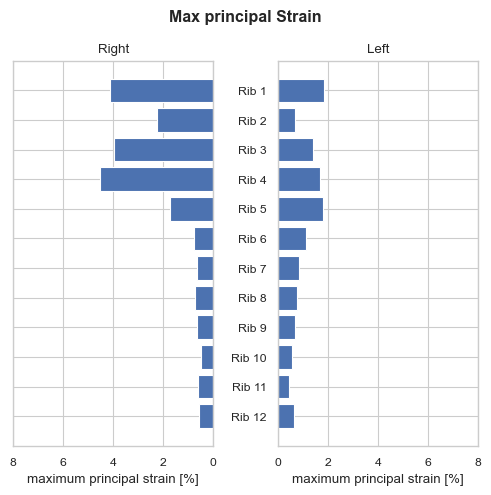

In [28]:
rib_lable=[]
R_strains=np.zeros(12)
L_strains=np.zeros(12)
for nr in range (1,13):
    rib_lable.append('Rib {}'.format(nr))
    R_strains[nr-1]=max(sim_output[Tests[0]]['Rib']['strain_R{}'.format(nr)].strain.values)[0]
    L_strains[nr-1]=max(sim_output[Tests[0]]['Rib']['strain_L{}'.format(nr)].strain.values)[0]
fig, axs = plt.subplots(figsize=(5,5), ncols=2, nrows=1)
fig.suptitle('Max principal Strain',fontweight='bold')
axs[0].barh(rib_lable, R_strains*100)
axs[1].barh(rib_lable, L_strains*100)
axs[0].set(title='Right',xlim=([8,0]),xlabel='maximum principal strain [%]');
axs[1].set(title='Left',xlim=([0,8]),xlabel='maximum principal strain [%]');
axs[0].tick_params(left = False, right = False , labelleft = False )
axs[1].set_yticks(range(len(rib_lable)),rib_lable)
axs[0].set_yticks(rib_lable)
axs[0].invert_yaxis()
axs[1].invert_yaxis()
fig.tight_layout()

In [29]:
# last 2 are NFR2+ and 3+ in %
tmp2 = 0
tmp3 = 0
for i in range(0,len(age)):
    IM_c = calculate_injury_matrix("40kmh",age[i],T2p,T3p,Test_num[i])
    tmp2 = tmp2 + IM_c['SAFER 10.0: NFR2+ [%]'][0]
    tmp3 = tmp3 + IM_c['SAFER 10.0: NFR3+ [%]'][0]
avg_nfr2 = tmp2/len(age)
avg_nfr3 = tmp3/len(age)
print('Overall Average for NFR2+: '+ str(avg_nfr2.round(2)))
print('Overall Average for NFR3+: '+ str(avg_nfr3.round(2)))

,Impact velocity,Average age,Test: NFR2+ [%],Test: NFR3+ [%],SAFER 10.0: NFR2+ [%],SAFER 10.0: NFR3+ [%]
0,40kmh,76,100,87.5,100.0,99.94


,Impact velocity,Average age,Test: NFR2+ [%],Test: NFR3+ [%],SAFER 10.0: NFR2+ [%],SAFER 10.0: NFR3+ [%]
0,40kmh,47,100,87.5,98.63,85.15


,Impact velocity,Average age,Test: NFR2+ [%],Test: NFR3+ [%],SAFER 10.0: NFR2+ [%],SAFER 10.0: NFR3+ [%]
0,40kmh,54,100,87.5,99.67,93.85


,Impact velocity,Average age,Test: NFR2+ [%],Test: NFR3+ [%],SAFER 10.0: NFR2+ [%],SAFER 10.0: NFR3+ [%]
0,40kmh,49,100,87.5,99.06,88.18


,Impact velocity,Average age,Test: NFR2+ [%],Test: NFR3+ [%],SAFER 10.0: NFR2+ [%],SAFER 10.0: NFR3+ [%]
0,40kmh,57,100,87.5,99.84,96.1


,Impact velocity,Average age,Test: NFR2+ [%],Test: NFR3+ [%],SAFER 10.0: NFR2+ [%],SAFER 10.0: NFR3+ [%]
0,40kmh,72,100,87.5,100.0,99.82


,Impact velocity,Average age,Test: NFR2+ [%],Test: NFR3+ [%],SAFER 10.0: NFR2+ [%],SAFER 10.0: NFR3+ [%]
0,40kmh,40,100,87.5,95.64,71.19


,Impact velocity,Average age,Test: NFR2+ [%],Test: NFR3+ [%],SAFER 10.0: NFR2+ [%],SAFER 10.0: NFR3+ [%]
0,40kmh,37,100,87.5,93.36,63.9


Overall Average for NFR2+: 98.27
Overall Average for NFR3+: 87.27
